<h2 style="text-align: center;">
Up-to-date Heart Attack Analysis
</h2>


#### Recognizing Variables in Dataset

| Feature   | Description                                                                                           |
|-----------|-------------------------------------------------------------------------------------------------------|
| **Age**   | Age of the patient                                                                                    |
| **Sex**   | Sex of the patient                                                                                   |
| **exang** | Exercise-induced angina (1 = yes; 0 = no)                                                             |
| **ca**    | Number of major vessels (0–3)                                                                         |
| **cp**    | Chest pain type:<br>• 1 = typical angina<br>• 2 = atypical angina<br>• 3 = non-anginal pain<br>• 4 = asymptomatic |
| **trtbps**| Resting blood pressure                                                                                |
| **chol**  | Serum cholesterol (mg/dl) fetched via BMI sensor                                                      |
| **fbs**   | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                 |
| **rest_ecg** | Resting electrocardiographic results:<br>• 0 = normal<br>• 1 = ST-T wave abnormality<br>• 2 = probable/definite left ventricular hypertrophy |
| **thalach**| Maximum heart rate achieved                                                                         |
| **target** | 0 = less chance of heart attack; 1 = more chance of heart attack                                      |


In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("heart.csv")

In [9]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [17]:
df.columns = new_columns

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.shape

(303, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Examining missing values

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
isnull_number = []
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

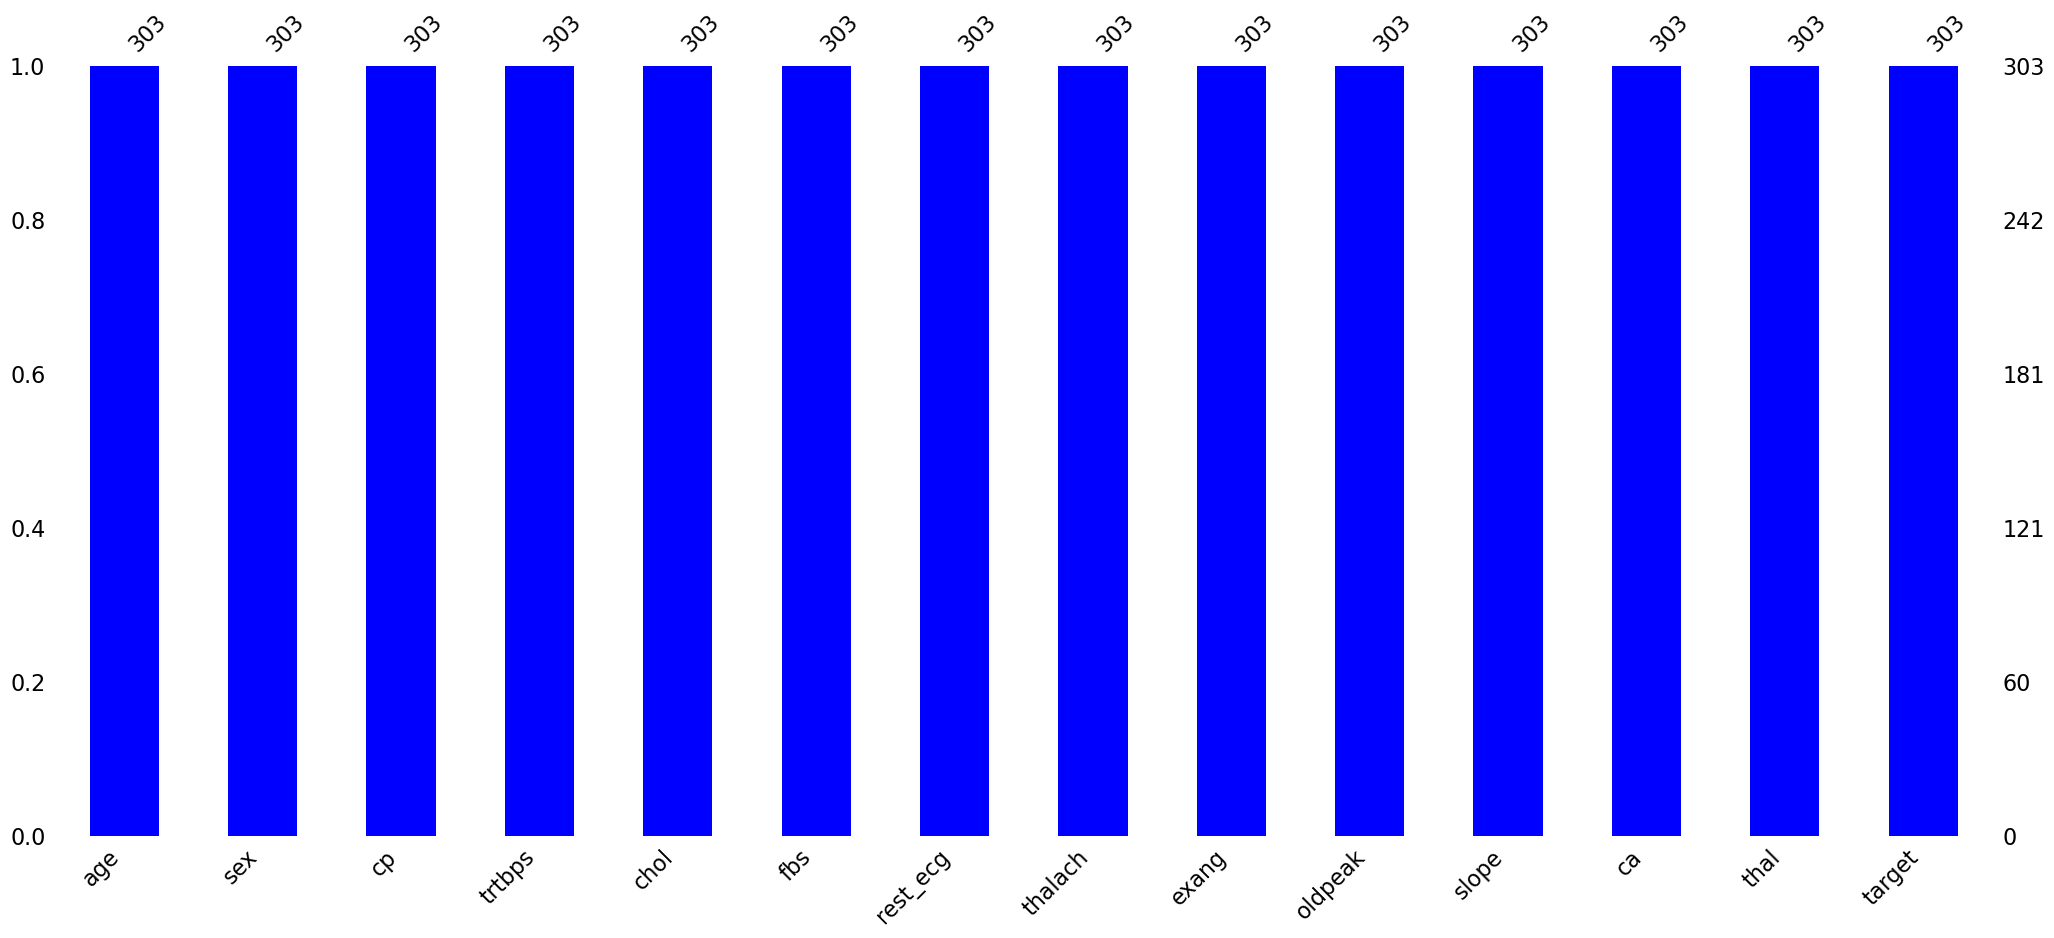

In [30]:
import missingno
missingno.bar(df,color="b")

#### Examining Unique Values

In [32]:
df["cp"].value_counts().count()

4

In [35]:
unique_number = []
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number,index=df.columns,columns=["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [220]:
numeric_var = ["age","trtbps","chol","thalach","oldpeak","target"]
categoric_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [222]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


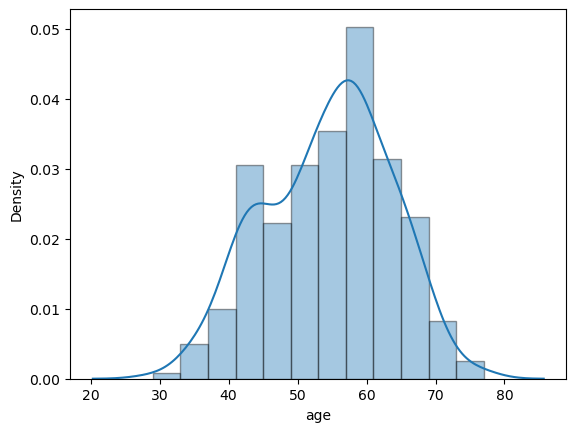

In [224]:
sns.distplot(df["age"],hist_kws = dict(linewidth=1,edgecolor = "k"));

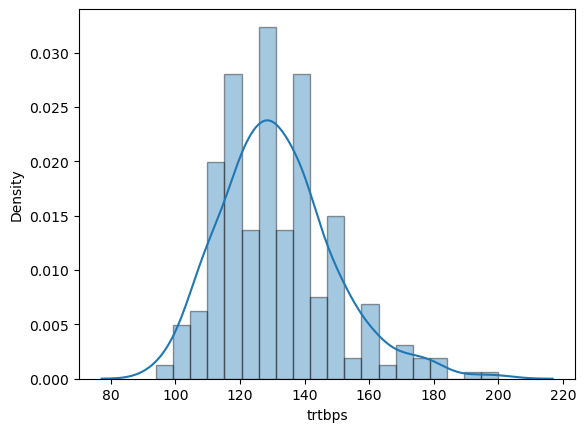

In [226]:
sns.distplot(df["trtbps"],hist_kws = dict(linewidth=1,edgecolor = "k"),bins=20);
#veri araligini 20 esit parcaya boler
#linewidth=1 Her çubuğun kenar çizgisinin kalınlığını (genişliğini) belirler.
#edgecolor da cubuklarin kenar rengini belirliyo

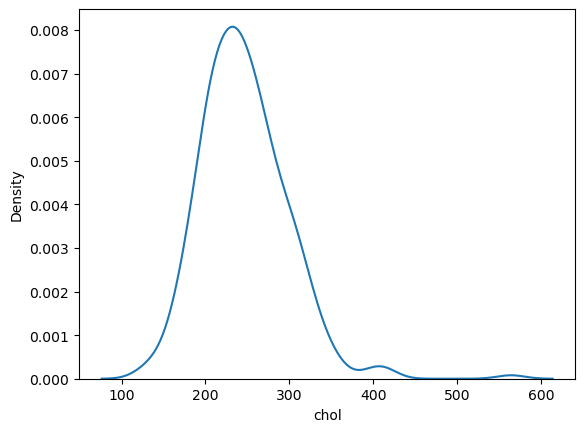

In [228]:
sns.distplot(df["chol"],hist = False);

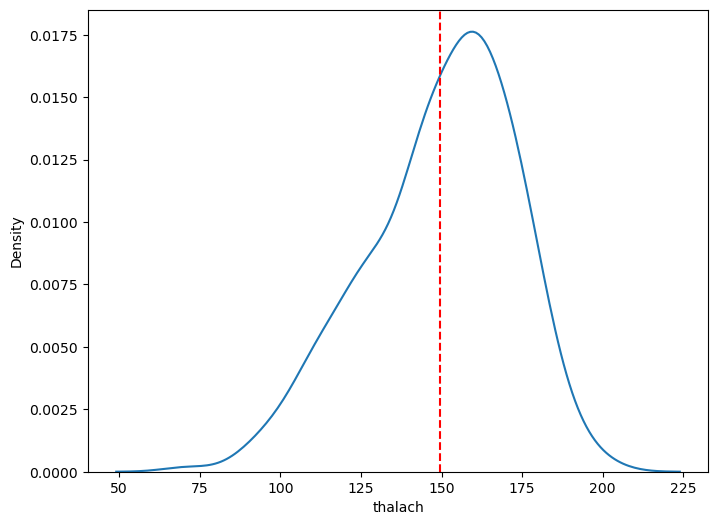

In [230]:
x,y = plt.subplots(figsize = (8,6))
sns.distplot(df["thalach"],hist = False, ax = y)
y.axvline(df["thalach"].mean(),color = "r", ls = "--")

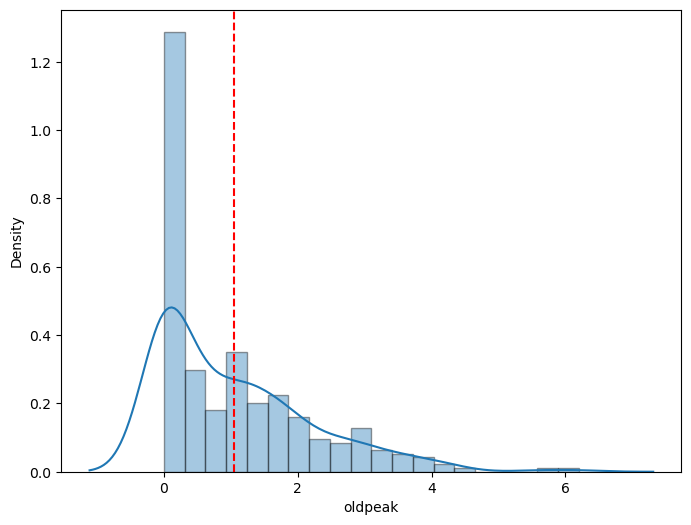

In [232]:
x,y = plt.subplots(figsize = (8,6))
sns.distplot(df["oldpeak"],hist_kws = dict(linewidth=1,edgecolor = "k"),bins=20,ax=y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--")

#### Exploratory Data Analysis

In [235]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [237]:
numeric_axis_name = ["Age of the Patient","Resting Blood Pressure","Cholesterol","Maximum Heart Rate Achievede" , "ST Depression"]

In [239]:
list(zip(numeric_var,numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achievede'),
 ('oldpeak', 'ST Depression')]

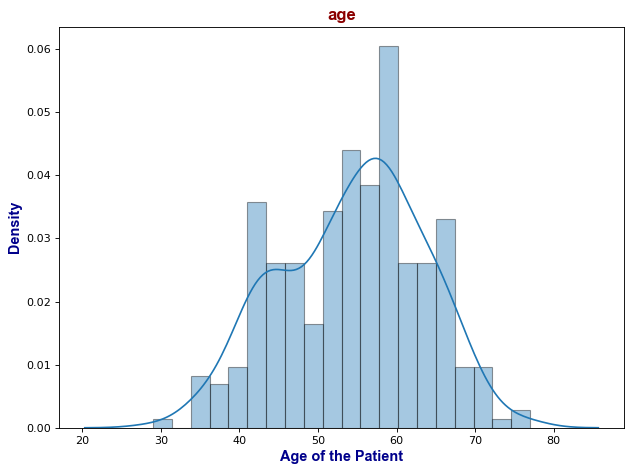

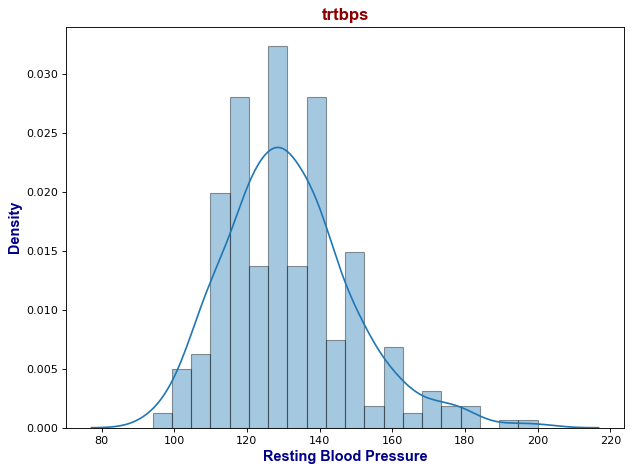

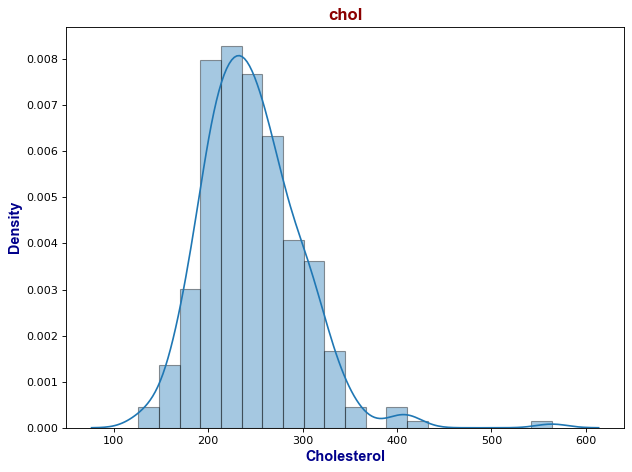

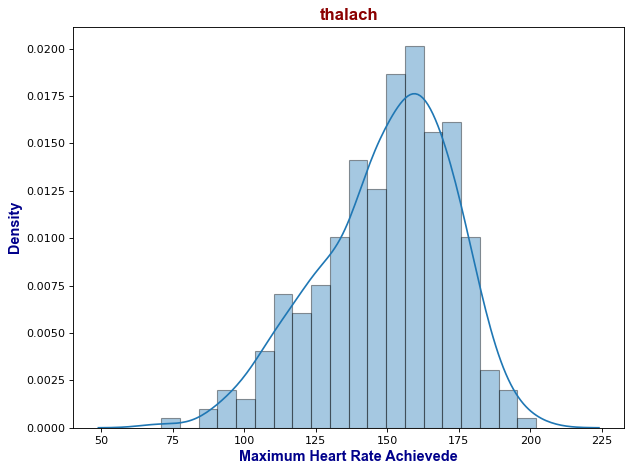

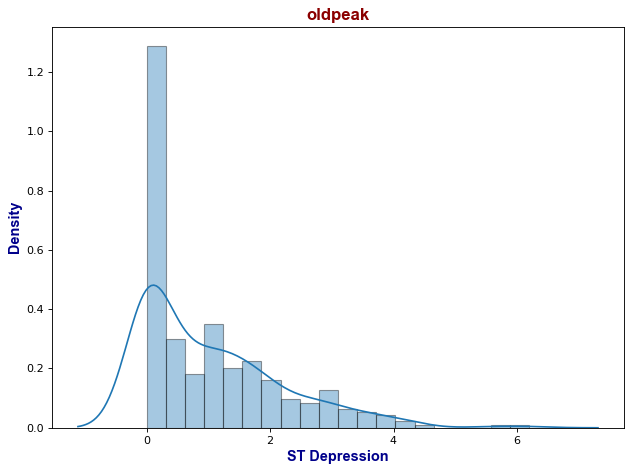

In [241]:
title_font = {"family" : "arial","color" : "darkred","weight": "bold","size" : 15}
axis_font = {"family" : "arial","color" : "darkblue","weight": "bold","size" : 13}

for i,z in list(zip(numeric_var,numeric_axis_name)):
    plt.figure(figsize=(8,6),dpi=80)
    sns.distplot(df[i],hist_kws = dict(linewidth = 1, edgecolor = "k"),bins = 20)

    plt.title(i,fontdict = title_font)
    plt.xlabel(z,fontdict = axis_font)
    plt.ylabel("Density",fontdict = axis_font)

    plt.tight_layout()
    plt.show()

#### Categorical Variables

In [244]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [246]:
categoric_axis_name = ["Gender","Chest Pain Type" , " Fasting Blood sugar" , " Resting Electrocardiographic Results",
                       "Exercise Induced Angina" , "The Slope of ST Segment" , "Number of Major Vessels", "Thal" , "Target"]

In [248]:
list(zip(categoric_var,categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', ' Fasting Blood sugar'),
 ('rest_ecg', ' Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [250]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [252]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [254]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

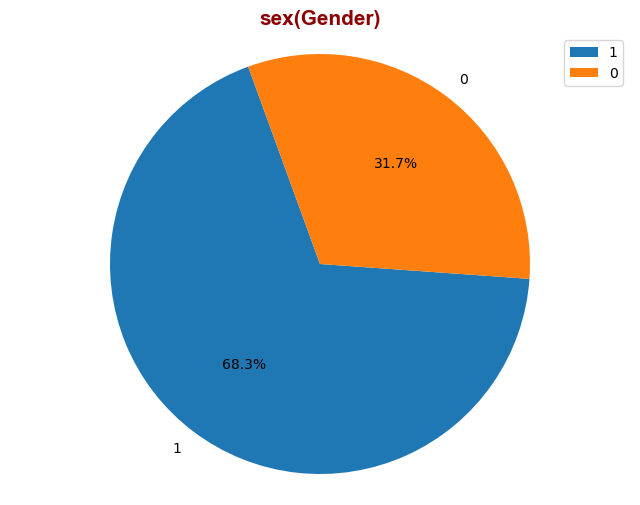

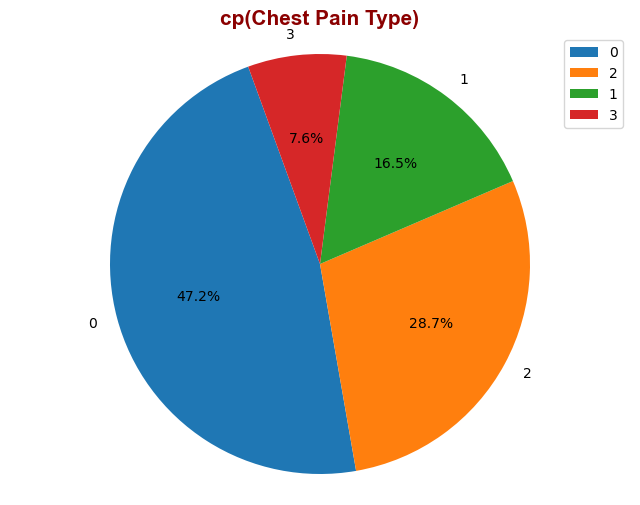

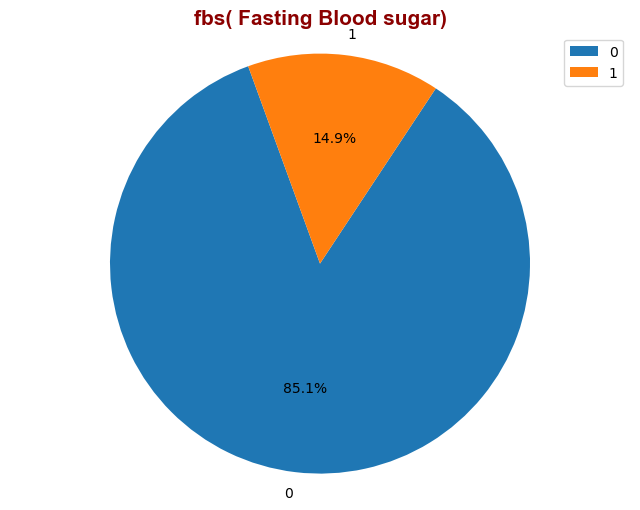

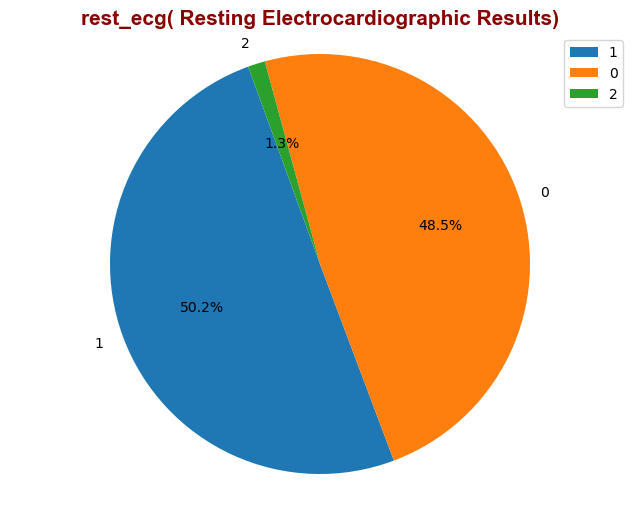

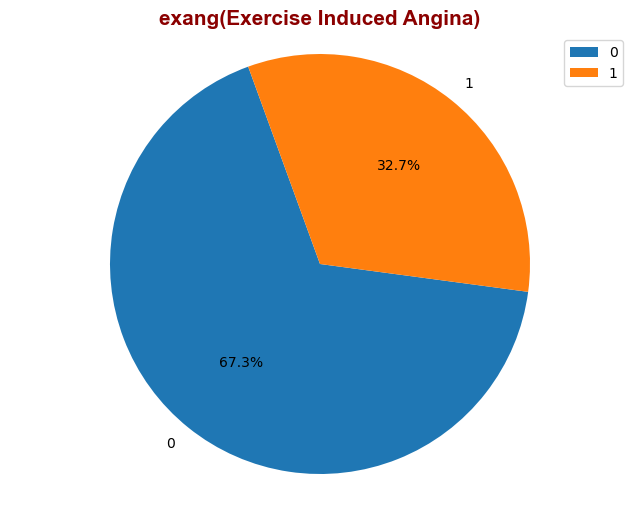

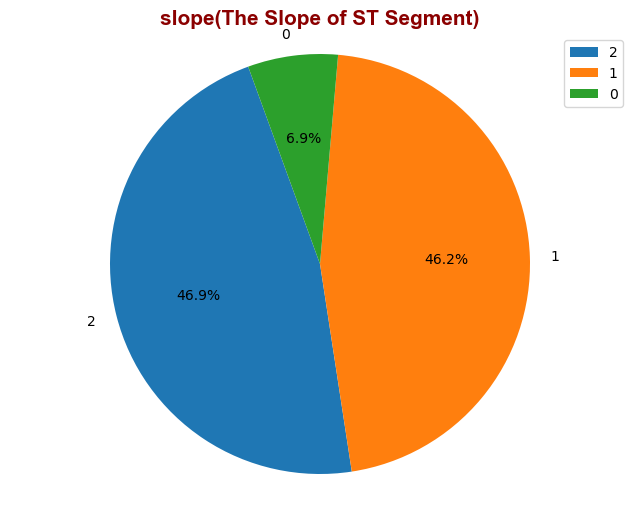

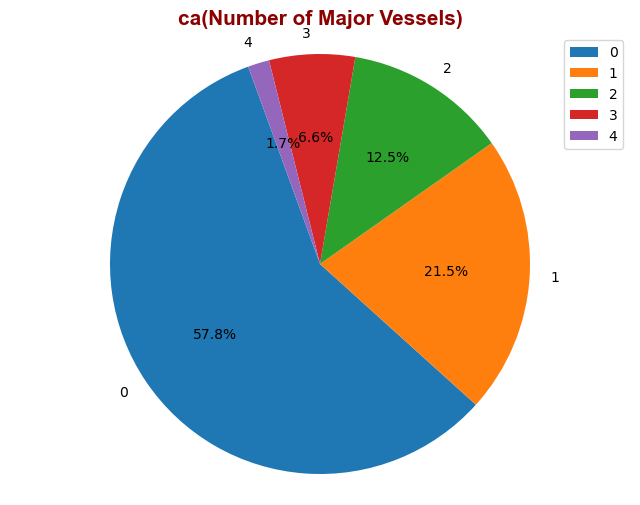

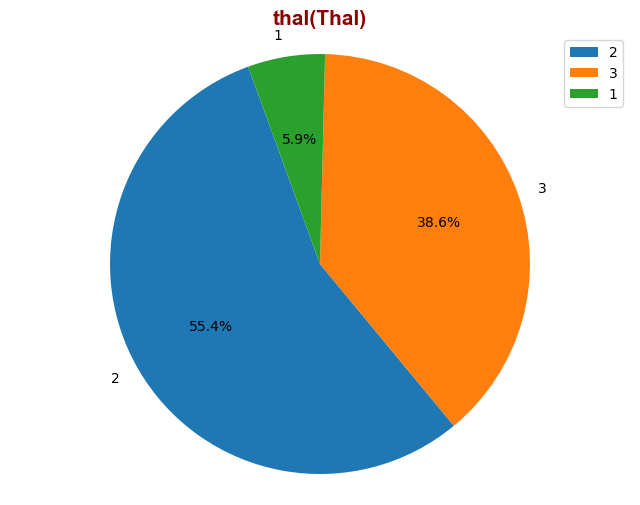

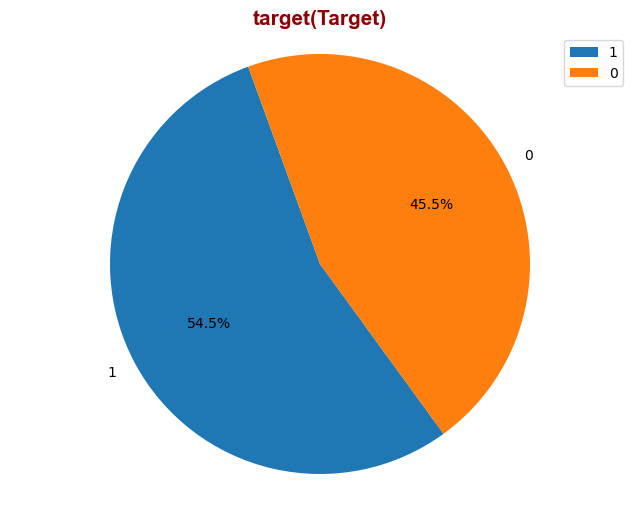

In [256]:
atitle_font = {"family" : "arial","color" : "darkred","weight": "bold","size" : 15}
axis_font = {"family" : "arial","color" : "darkblue","weight": "bold","size" : 13}

for i,z in list(zip(categoric_var,categoric_axis_name)):
    fig,ax = plt.subplots(figsize = (8,6)) #8 x 6 inc boyutunda

    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, # dilimlerin büyüklükleri
           labels = observation_values ,
           autopct = '%1.1f%%', # yüzde gösterimi, örn. “23.4%”
           startangle = 110,  # ilk dilimin başlangıç açısı
           labeldistance = 1.1 # etiketlerin dilim merkezinden uzaklığı
          )
    
    ax.axis("equal") #– X ve Y eksen ölçeklerini eşitleyerek pastanın eliptik değil tam daire olarak görünmesini sağlar.

    plt.title((i + "(" + z + ")"),fontdict = title_font)
    plt.legend()
    plt.show()

#### Examining the Missind Data

In [259]:
df[df["thal"]==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target


In [261]:
df["thal"] = df["thal"].replace(0,np.nan)

In [263]:
df.loc[[48,281],:]  # : -> butun degerleri dondurur secilen sutundaki

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [265]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns =  ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [267]:
df["thal"].fillna(2,inplace=True)

In [269]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [271]:
df.head() #thal degeri float oldu

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [273]:
df["thal"]= pd.to_numeric(df["thal"],downcast="integer")

In [275]:
df.loc[[28,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [278]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number,index=df.columns,columns =  ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [281]:
df["thal"].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

In [284]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

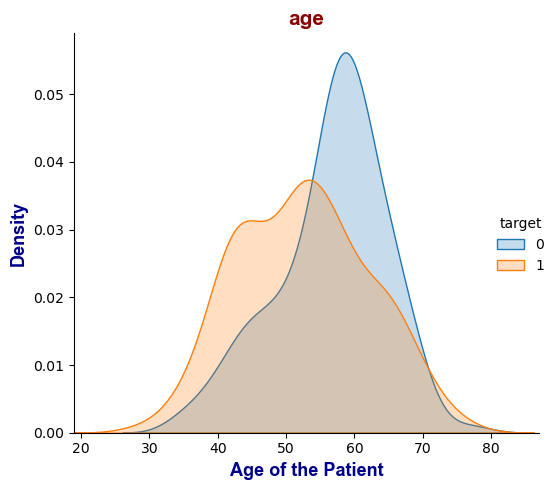

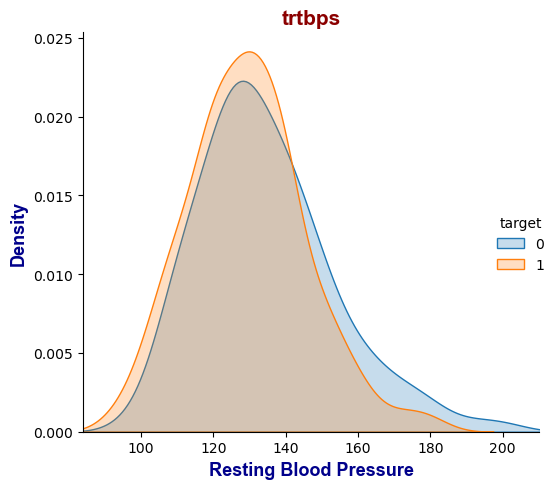

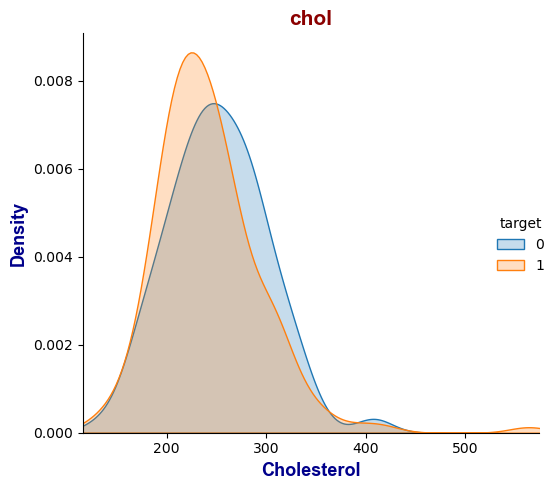

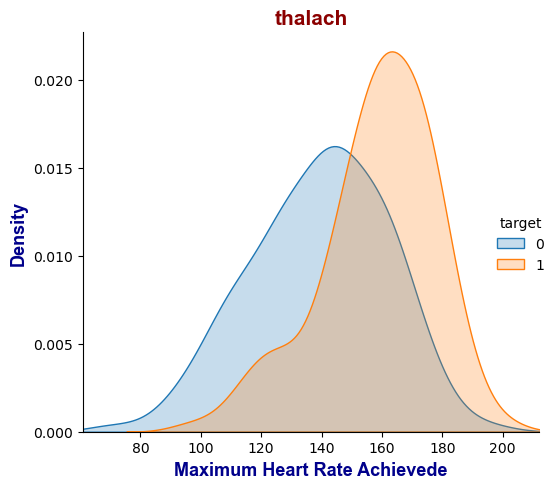

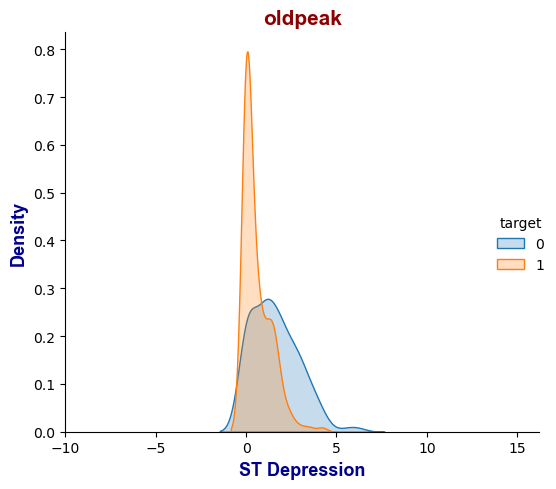

In [286]:
title_font = {"family" : "arial","color" : "darkred","weight": "bold","size" : 15}
axis_font = {"family" : "arial","color" : "darkblue","weight": "bold","size" : 13}


for i, z in list(zip(numeric_var, numeric_axis_name)):
    # Create FacetGrid with the full DataFrame
    graph = sns.FacetGrid(
        df,  
        hue="target",
        height=5,
        xlim=((df[i].min() - 10, df[i].max() + 10))
    )
    # Map kdeplot to the current numeric variable i
    graph.map(sns.kdeplot, i, shade=True)  # Replace 1 with i
    graph.add_legend()

    # Set title and labels
    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Density", fontdict=axis_font)

    plt.tight_layout()
    plt.show()

In [287]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [290]:
df[numeric_var].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### Categorical Variables

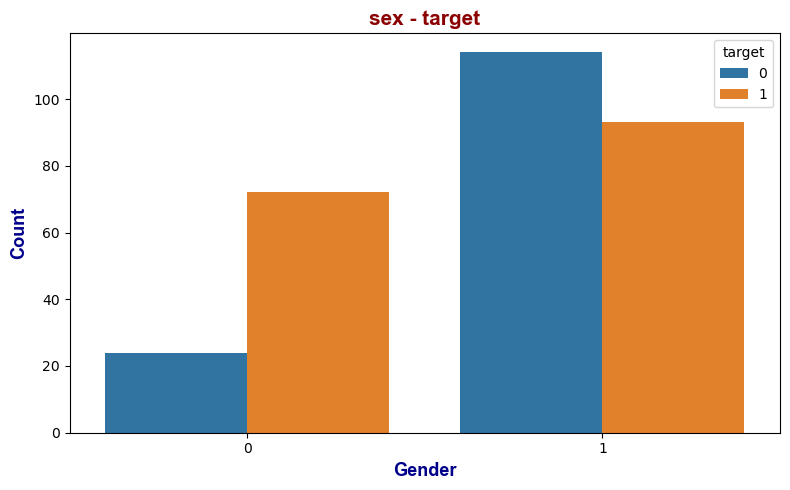

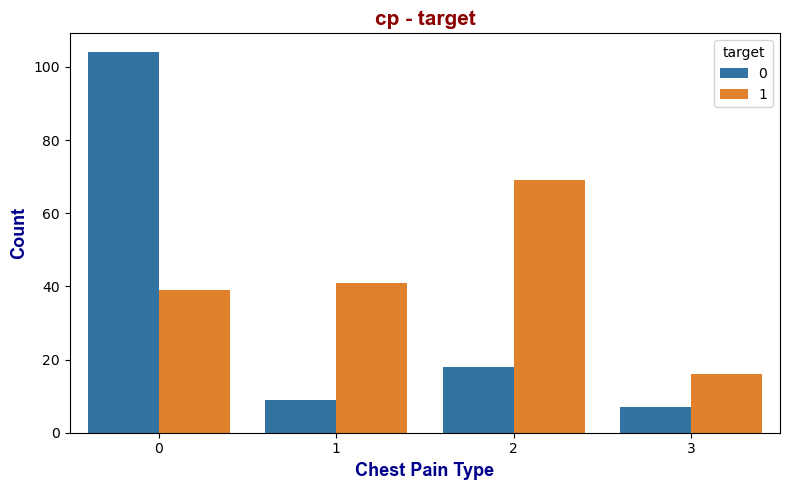

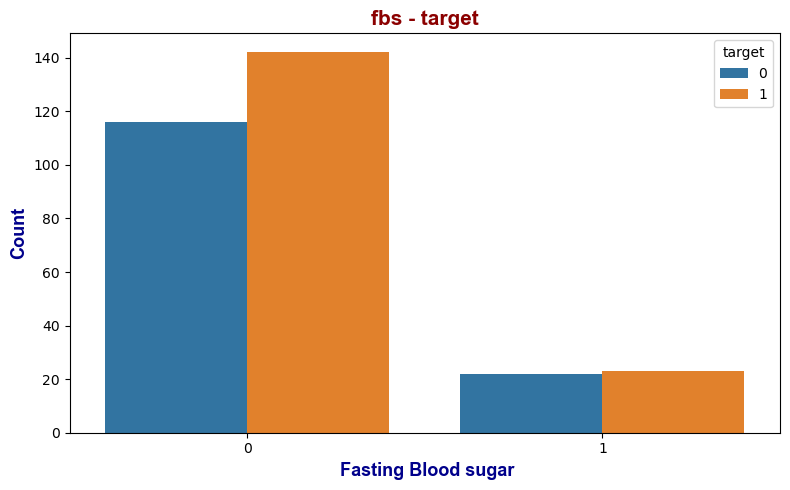

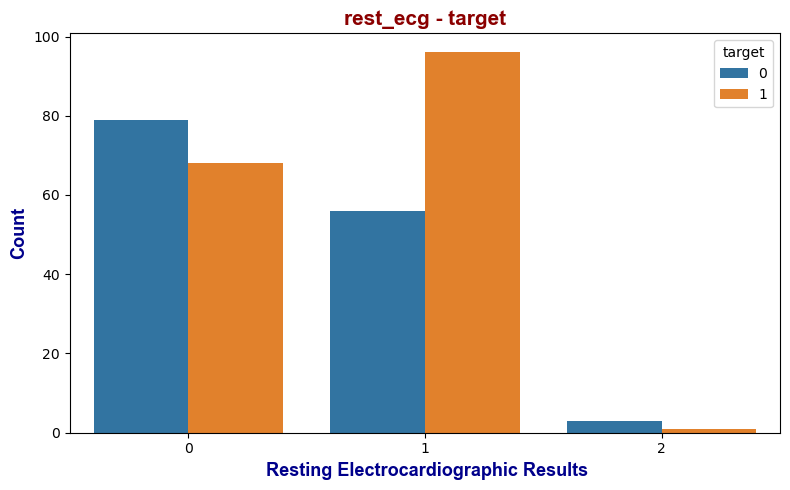

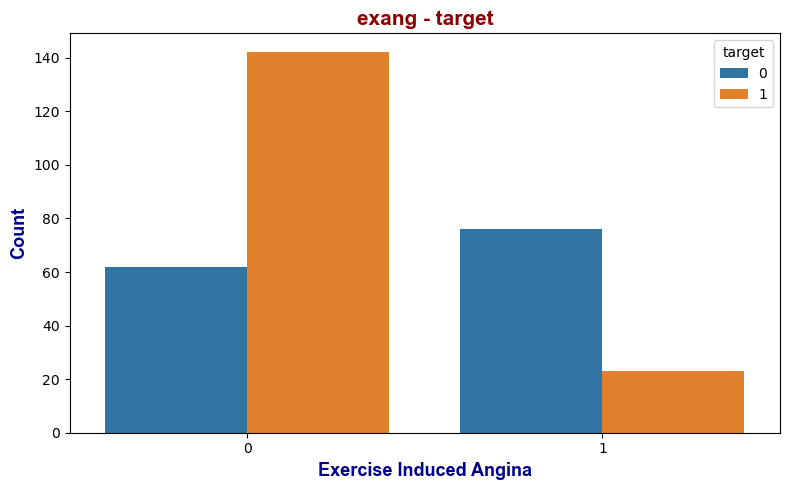

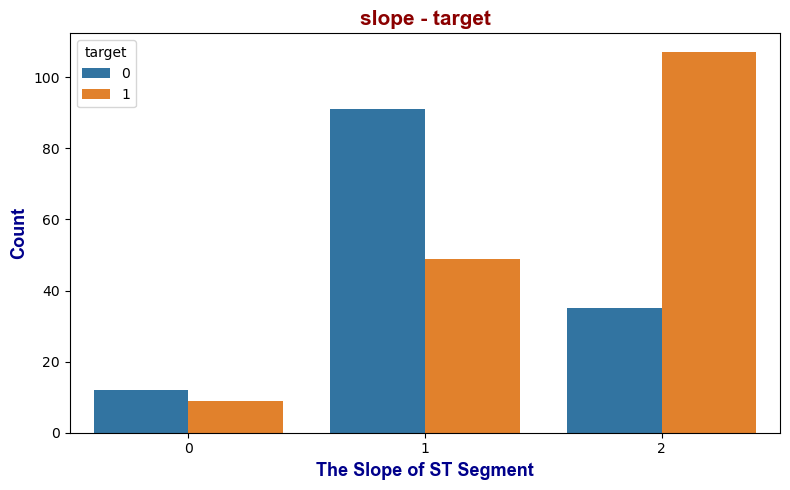

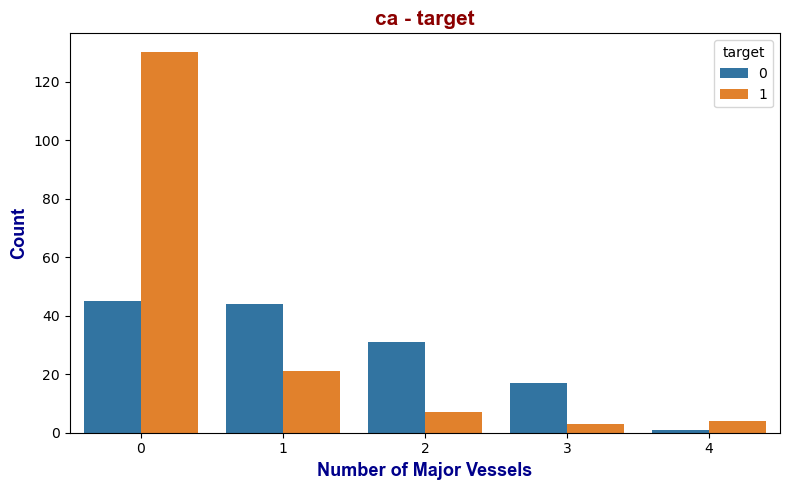

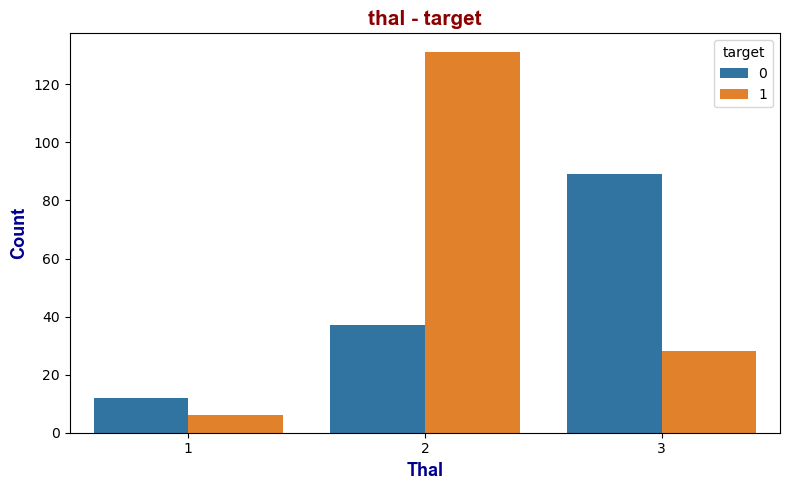

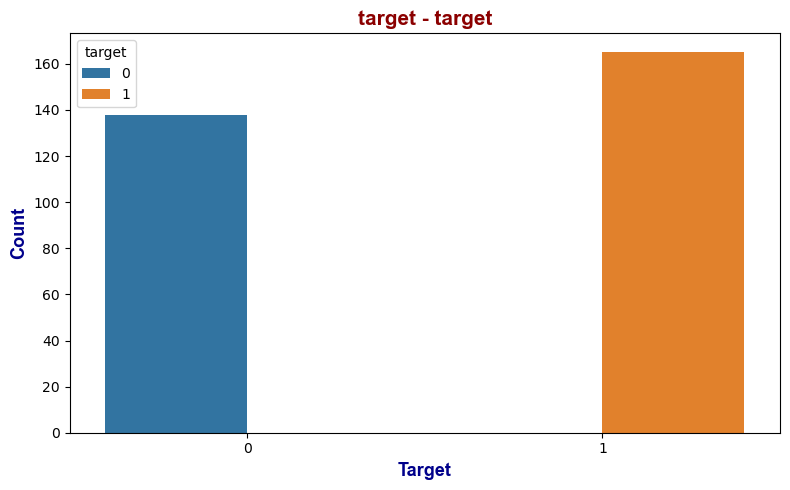

In [293]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font  = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

for i, z in zip(categoric_var, categoric_axis_name):
    plt.figure(figsize=(8,5))
    sns.countplot(
        x=i, 
        data=df, 
        hue="target"
    )
    plt.title(f"{i} - target", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Count", fontdict=axis_font)  # "Target" değil, sayıyı anlatan label daha uygun olur
    plt.tight_layout()
    plt.show()


In [295]:
df[categoric_var].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [298]:
df[categoric_var].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000
